Inbar Naus

Barak Samesh

# **Assignment 1 – Practical Deep Learning Workshop**

---
# **Part 1- Exploring the Dataset**
CIFAR-100 Dataset:


a. The size of the Dataset is 60,000 photos devided to 50,000 train samples and 10,000 test samples.


b. Each sample of data is 32x32 pixels, and 3 channels (RGB). There are 20 superclasses and for each superclass there are 5 classes.


c. There is no need for preproccessing our dataset.
We can use horizontal flipping and gentle rotation, for example, for enlarging our dataset.

d. The data is balanced. (look at the graph in cell 3).


e. Using EfficientNet 91.7% was achived on CIFAR-100.

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # chart plotting
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns # plotting heat maps

from keras.datasets import cifar100
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Flatten, Input, AvgPool2D, MaxPool2D, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from functools import reduce  # functional operation on lists
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
# loading the data
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 13s 0us/step


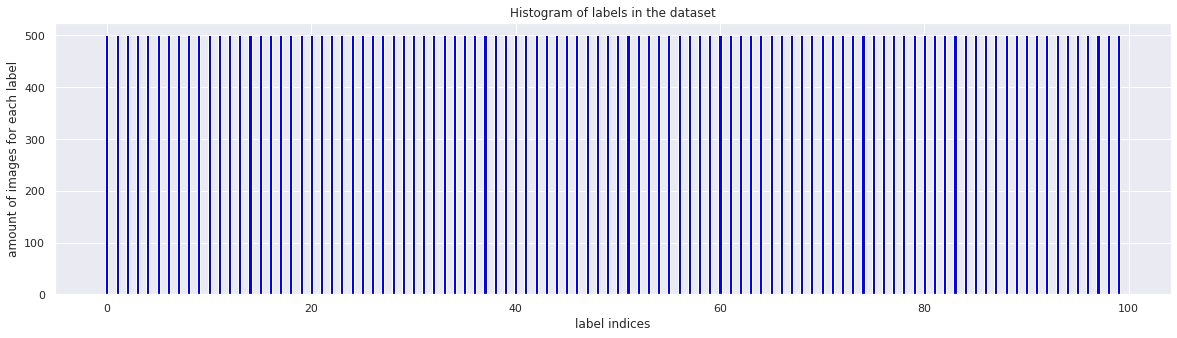

In [ ]:
sorted = np.sort(np.concatenate((y_test, y_train), axis=None), axis = 0)
unique_elements, counts_elements = np.unique(y_train, return_counts=True)

plt.figure(figsize=(20,5))
# plotting a bar chart 
plt.bar(range(len(unique_elements)), counts_elements, 
        width = 0.3, color = ['blue']) 
  
# naming the x-axis 
plt.xlabel('label indices') 
# naming the y-axis 
plt.ylabel('amount of images for each label') 
# plot title 
plt.title('Histogram of labels in the dataset') 

# function to show the plot 
plt.show() 

  

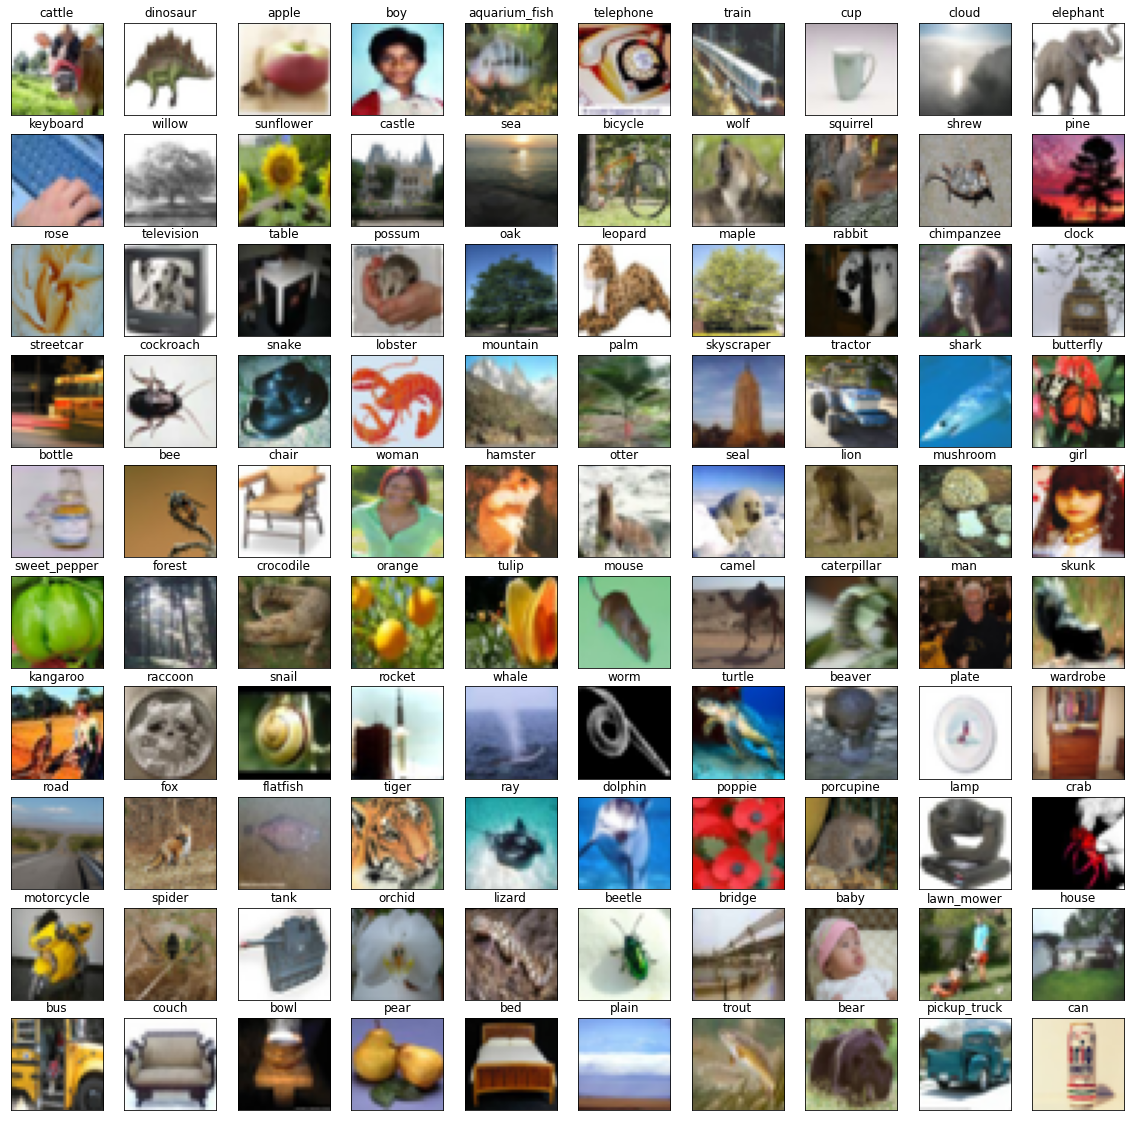

In [ ]:
label_list = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak', 'orange', 'orchid', 'otter', 'palm', 'pear',
    'pickup_truck', 'pine', 'plain', 'plate', 'poppie', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow', 'wolf', 'woman',
    'worm']

unique = []
images = []

for x in range(X_train.size):
  if len(unique) < 100 :
    if y_train[x].item(0) not in unique:
        unique.append(y_train[x].item(0))
        images.append(X_train[x])
  else:
      break

labels = []
for x in unique:
  labels.append(label_list[x])

_, axes = plt.subplots(10, 10, figsize=(20, 20))
index = 0
for ax, img ,title in zip(axes.flatten(), images, labels):
    ax.imshow(img)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    index = index + 5

# **Part 2- Building and Fitting a Model**
### a. We have decided to use cross-validation strategy for training our model.

### b. The model's construction, train and results analysis:

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(128,(1,1), activation='relu' ))
model.add(Dropout(0.3))

model.add(AvgPool2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu' ))
model.add(Conv2D(192,(3,3), activation='relu' ))
model.add(Dropout(0.4))

model.add(AvgPool2D(2,2))
model.add(Conv2D(192,(3,3), activation='relu' ))
model.add(Conv2D(192,(3,3), activation='relu' ))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(100,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 128)       8320      
_________________________________________________________________
dropout_7 (Dropout)          (None, 30, 30, 128)       0         
_________________________________________________________________
average_pooling2d_5 (Average (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 128)       147584    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 192)       221376    
_________________________________________________________________
dropout_8 (Dropout)          (None, 11, 11, 192)      

In [ ]:
# training the model

monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=6)
lr_sched = ReduceLROnPlateau(patience=4)


history = model.fit(X_train,
    to_categorical(y_train),
    batch_size=120,
    epochs=50,
    verbose=1,
    shuffle=True,
    callbacks=[monitor_val_acc, lr_sched],
    validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 7s 170us/step - loss: 4.4662 - accuracy: 0.0303 - val_loss: 4.1281 - val_accuracy: 0.0709
Epoch 2/50
40000/40000 [==============================] - 6s 162us/step - loss: 4.0563 - accuracy: 0.0789 - val_loss: 3.7639 - val_accuracy: 0.1330
Epoch 3/50
40000/40000 [==============================] - 7s 163us/step - loss: 3.7734 - accuracy: 0.1213 - val_loss: 3.5188 - val_accuracy: 0.1750
Epoch 4/50
40000/40000 [==============================] - 7s 163us/step - loss: 3.5432 - accuracy: 0.1596 - val_loss: 3.2789 - val_accuracy: 0.2145
Epoch 5/50
40000/40000 [==============================] - 7s 164us/step - loss: 3.3663 - accuracy: 0.1927 - val_loss: 3.1120 - val_accuracy: 0.2440
Epoch 6/50
40000/40000 [==============================] - 7s 164us/step - loss: 3.1900 - accuracy: 0.2232 - val_loss: 3.0180 - val_accuracy: 0.2574
Epoch 7/50
40000/40000 [==============================] - 7s 1

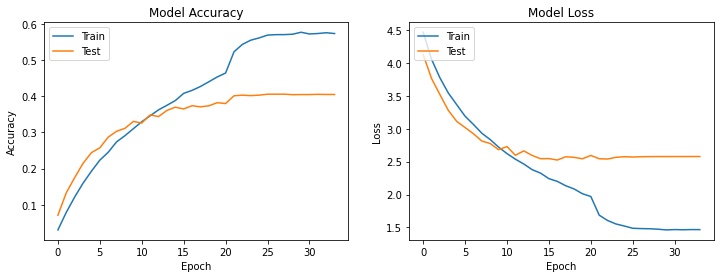

In [ ]:
# Plot training & validation accuracy rates
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss rates
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='upper left')
plt.show()

### The model achieved poor accuracy percentage compared to the benchmark mentioned above.

### It is also noticable that the model suffers from **overfitting**.

model accuracy on test set is: 40.92%


Text(0.5, 1.0, 'First model results on test set')

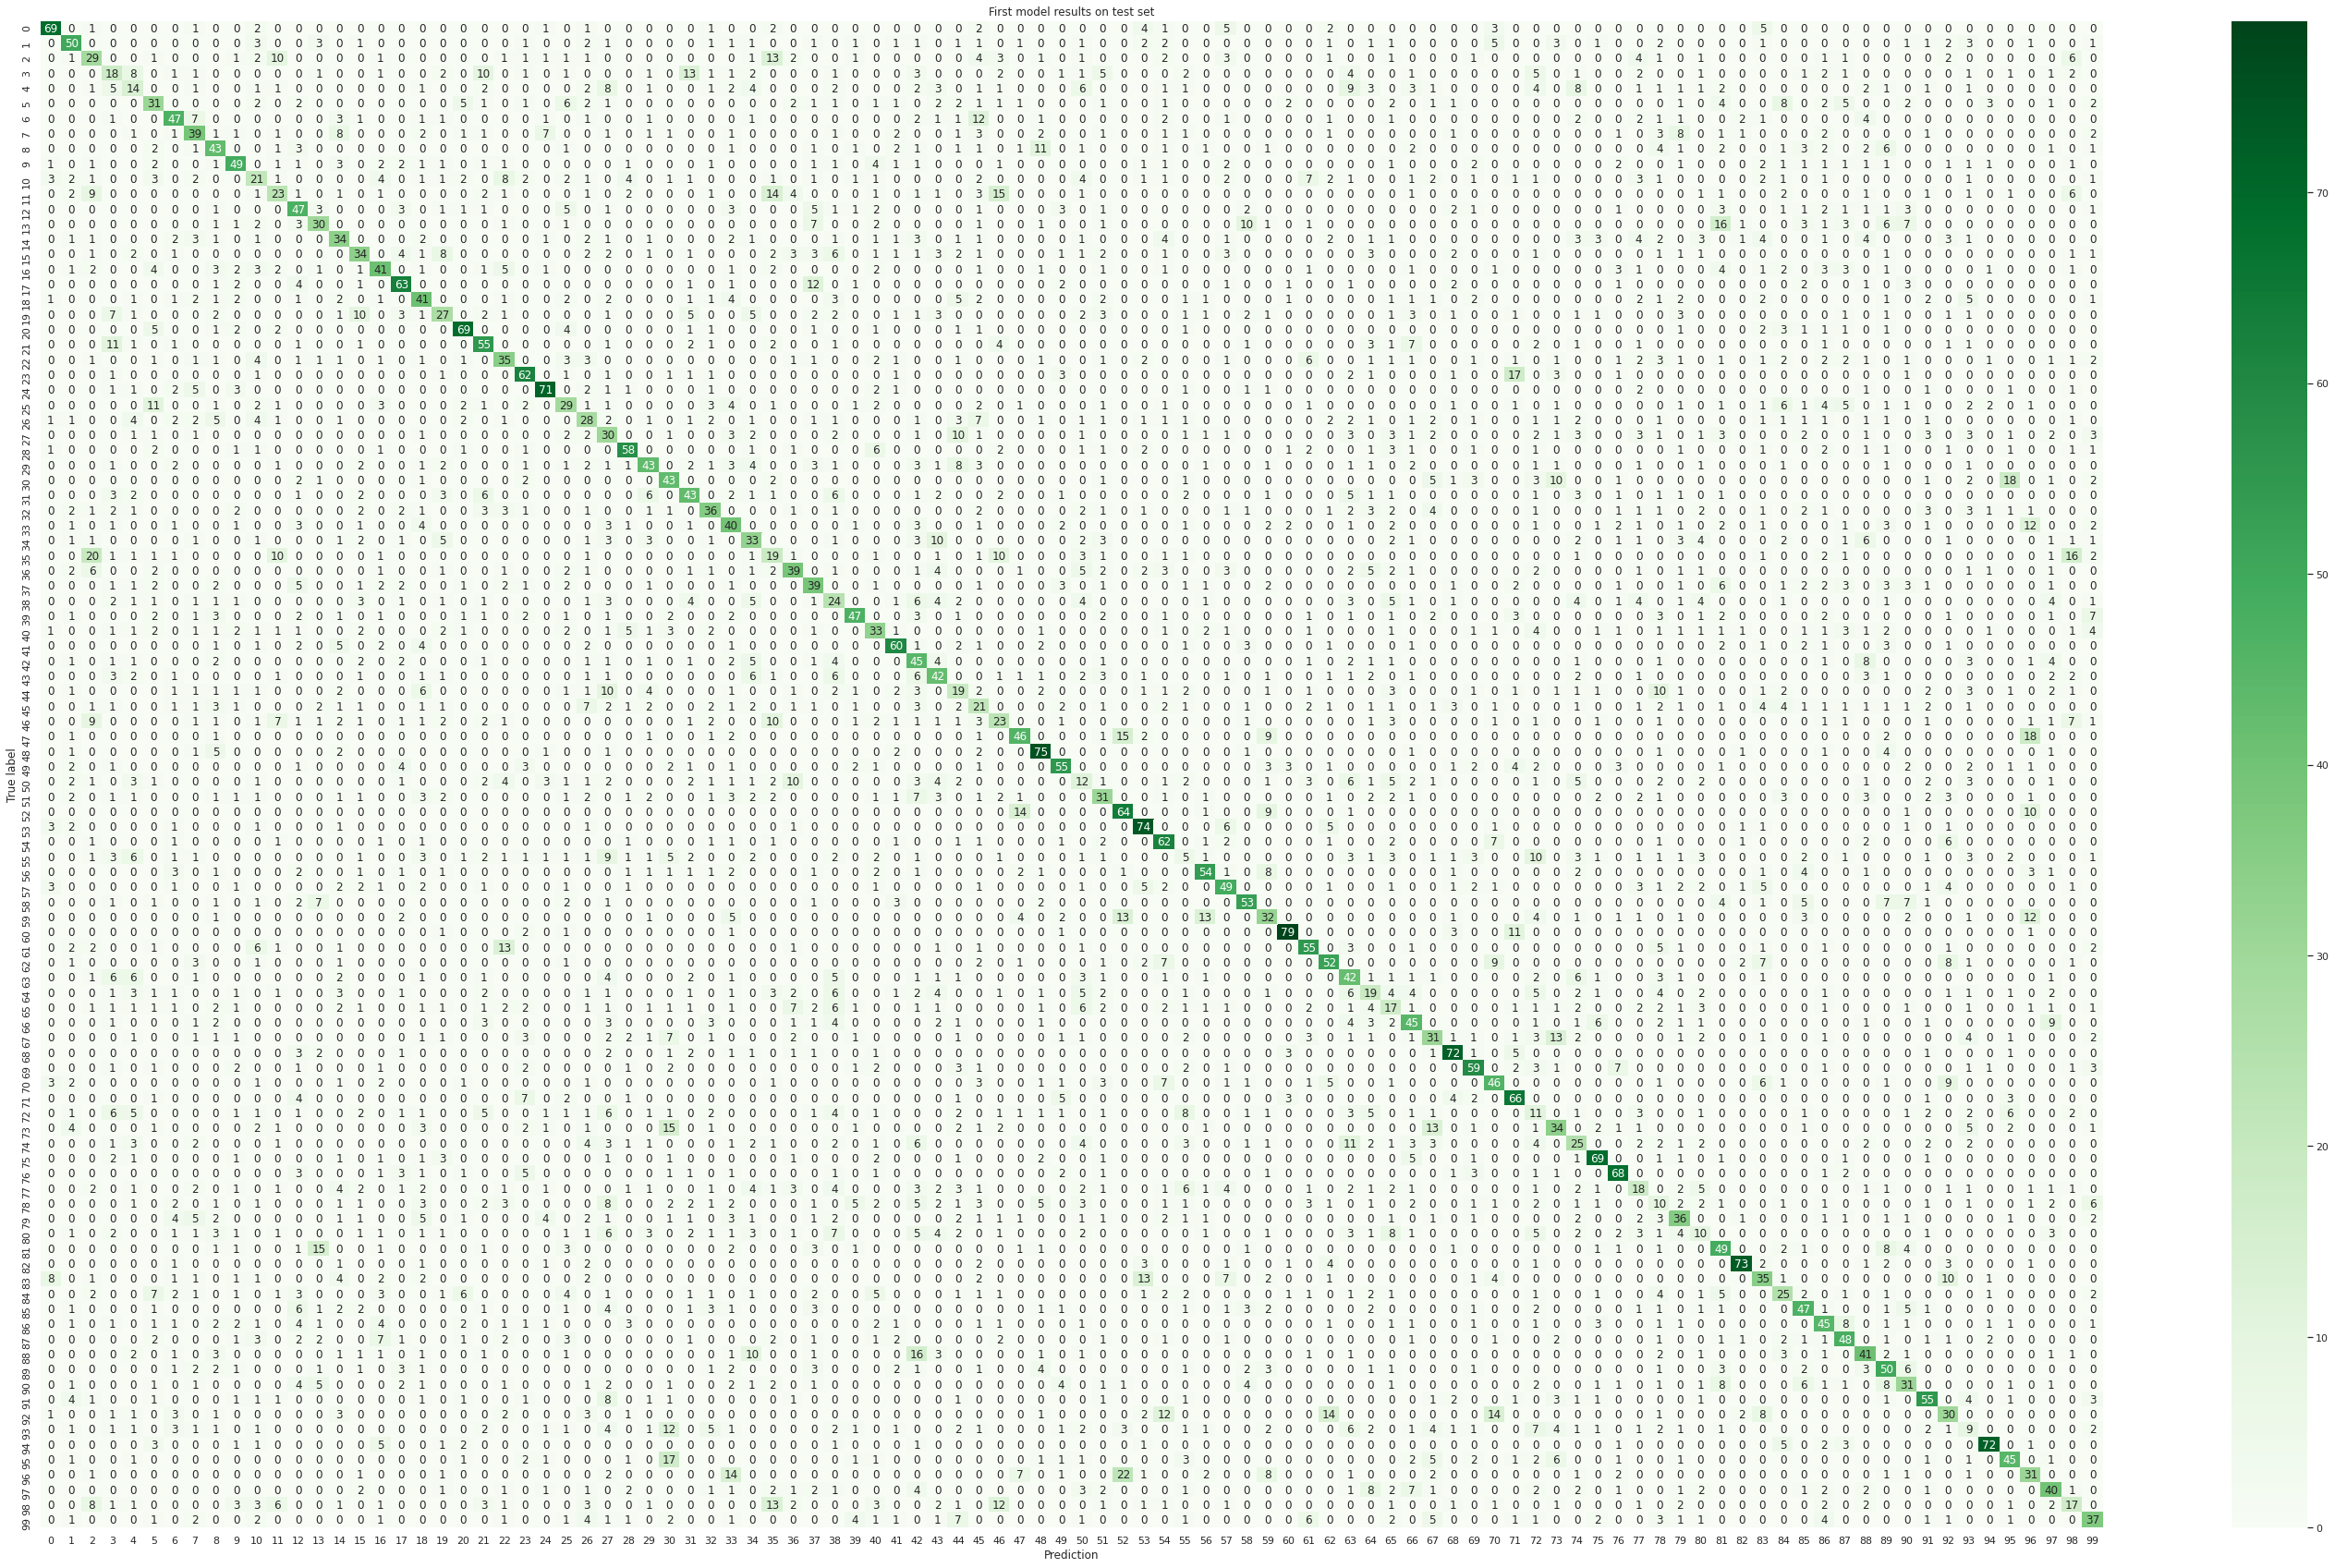

In [ ]:
# plot a heat map of the predictions on unseen data

y_pred = model.predict(X_test)
pred_cat = np.argmax(y_pred,axis=1)
confusion_mat = confusion_matrix(y_test,pred_cat)
print('model accuracy on test set is: {}%'.format(accuracy_score(y_test,pred_cat)*100))
sns.heatmap(confusion_mat,cmap='Greens',annot=True, fmt='d')
sns.set(rc={'figure.figsize':(50,30)})
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('First model results on test set')


### We can see that the label that was predicted by the model correctly the most times is **Plain**.

### Below are a few examples of samples labled 'Plain'.


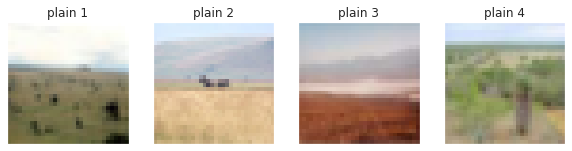

In [ ]:
#picking the class with most right predictions (highest value on the main diagonal)
diagonal = [confusion_mat[i][i] for i in range(len(confusion_mat)) ]
maximum_value = reduce((lambda element, maximum: max(maximum, element)), diagonal)
class_index = diagonal.index(maximum_value) # the index of the desired class

def plot_samples(class_index, n_samples):
  """A function that prints n_samples image samples from the class with index class_index"""
  # finding the indices of samples labeled label_index
  sample_indices = np.where(y_test == class_index)
  samples = []
  # sampling
  for x in range(n_samples):
    samples.append(X_test[sample_indices[0][x]])

  #creating titles list
  title = label_list[class_index]
  titles = [title + " " + str(x+1) for x in range(n_samples)]
  # plotting
  _, axes = plt.subplots(1, n_samples, figsize=(10,10))
  for ax, img, title in zip(axes.flatten(), samples, titles):
      ax.imshow(img)
      ax.set_title(title)
      ax.set_xticks([])
      ax.set_yticks([])

plot_samples(class_index, 4)

### C. We can see that a common mistake the model made is predicting **Willow** to be **Oak**. If we examin samples from the corresponding classes, we can indeed notice some visual similarities (well, they both are trees..). 

### Below are a few examples for samples from the corresponding classes.


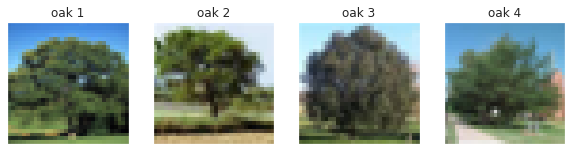

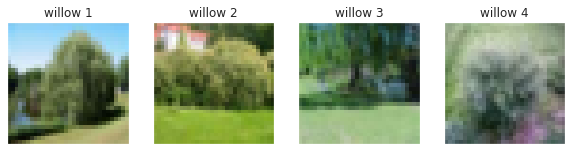

In [ ]:
# picking a common mistake and plotting corresponding samples

pred_index = 52 # oak
true_index = 96 # willow

#print samples of the relevant classes
plot_samples(pred_index, 3)
plot_samples(true_index, 3)


### d. We can improve the accuracy by taking these three meassures:

*   Changing architecture
*   Augmentation
*   K-Fold cross validation

### We will implement the first two of these. First, changing the architecture, including usage of a new layer- **BatchNormalization**:

In [ ]:
#model improvement
from keras import regularizers
weight_decay = 1e-5
model2 = Sequential()
model2.add(Conv2D(64,(3,3),activation='elu',input_shape=(32,32,3)))

model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Conv2D(92,(3,3),activation='elu', padding='same'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))

model2.add(Conv2D(128,(3,3),activation='elu', padding='same'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))

model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Conv2D(128,(3,3),activation='elu', padding='same'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))

model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Conv2D(128,(3,3),activation='elu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(912,activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(100,activation='softmax'))

model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Next, using augmentation as preprocessing for enlarging the dataset:

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import math

# Instantiating a data generator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

# determine the operation's parameters
batch_size = 10
train_val_split = 0.2
split_index = math.ceil(len(X_train) * (1 - train_val_split))
augmnt_factor = 2 # the factor of wich the dataset will be increased by 

train_iter = datagen.flow(X_train[:split_index],to_categorical(y_train[:split_index]), batch_size=batch_size)

val_iter = datagen.flow(X_train[split_index:],to_categorical(y_train[split_index:]), batch_size=batch_size)

history2 = model2.fit_generator(train_iter,
                    validation_data = val_iter,
                    steps_per_epoch = math.ceil(split_index / batch_size) * augmnt_factor,
                    validation_steps = math.ceil((len(X_train)-split_index) / batch_size) * augmnt_factor,
                    callbacks=[monitor_val_acc, lr_sched],
                    epochs=50)

Epoch 1/50
8000/8000 [==============================] - 111s 14ms/step - loss: 4.2306 - accuracy: 0.0573 - val_loss: 98.8827 - val_accuracy: 0.0487
Epoch 2/50
8000/8000 [==============================] - 110s 14ms/step - loss: 3.8500 - accuracy: 0.1043 - val_loss: 299.2845 - val_accuracy: 0.0848
Epoch 3/50
8000/8000 [==============================] - 108s 13ms/step - loss: 3.5473 - accuracy: 0.1555 - val_loss: 104.5778 - val_accuracy: 0.1338
Epoch 4/50
8000/8000 [==============================] - 107s 13ms/step - loss: 3.2872 - accuracy: 0.2030 - val_loss: 267.0200 - val_accuracy: 0.1297
Epoch 5/50
8000/8000 [==============================] - 109s 14ms/step - loss: 3.0849 - accuracy: 0.2430 - val_loss: 49.2853 - val_accuracy: 0.1705
Epoch 6/50
8000/8000 [==============================] - 109s 14ms/step - loss: 2.9556 - accuracy: 0.2715 - val_loss: 53.9747 - val_accuracy: 0.1546
Epoch 7/50
8000/8000 [==============================] - 108s 13ms/step - loss: 2.8637 - accuracy: 0.2898 - va

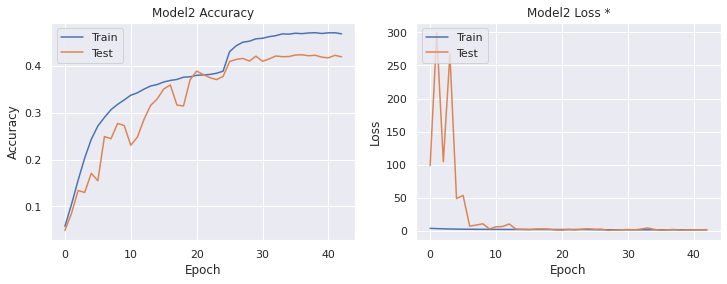

In [ ]:
# Plot training & validation accuracy rates
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(history2.history['accuracy'])
ax[0].plot(history2.history['val_accuracy'])
ax[0].set_title('Model2 Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss rates
ax[1].plot(history2.history['loss'])
ax[1].plot(history2.history['val_loss'])
ax[1].set_title('Model2 Loss *')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='upper left')
plt.show()

### This model's accuracy is simillar to the last model's, but the difference between the final train accuracy and validation accuracy is smaller than the corresponding scores on the last model, which means this model is less overfitting than the last.

*On the 'Model2 Loss' chart, the train loss is apparent to be 0, but it is because the initial peaks of the validation loss which are greater compared to the low values of the train loss

model accuracy on test set is: 46.36%


Text(0.5, 1.0, 'Second model results on test set')

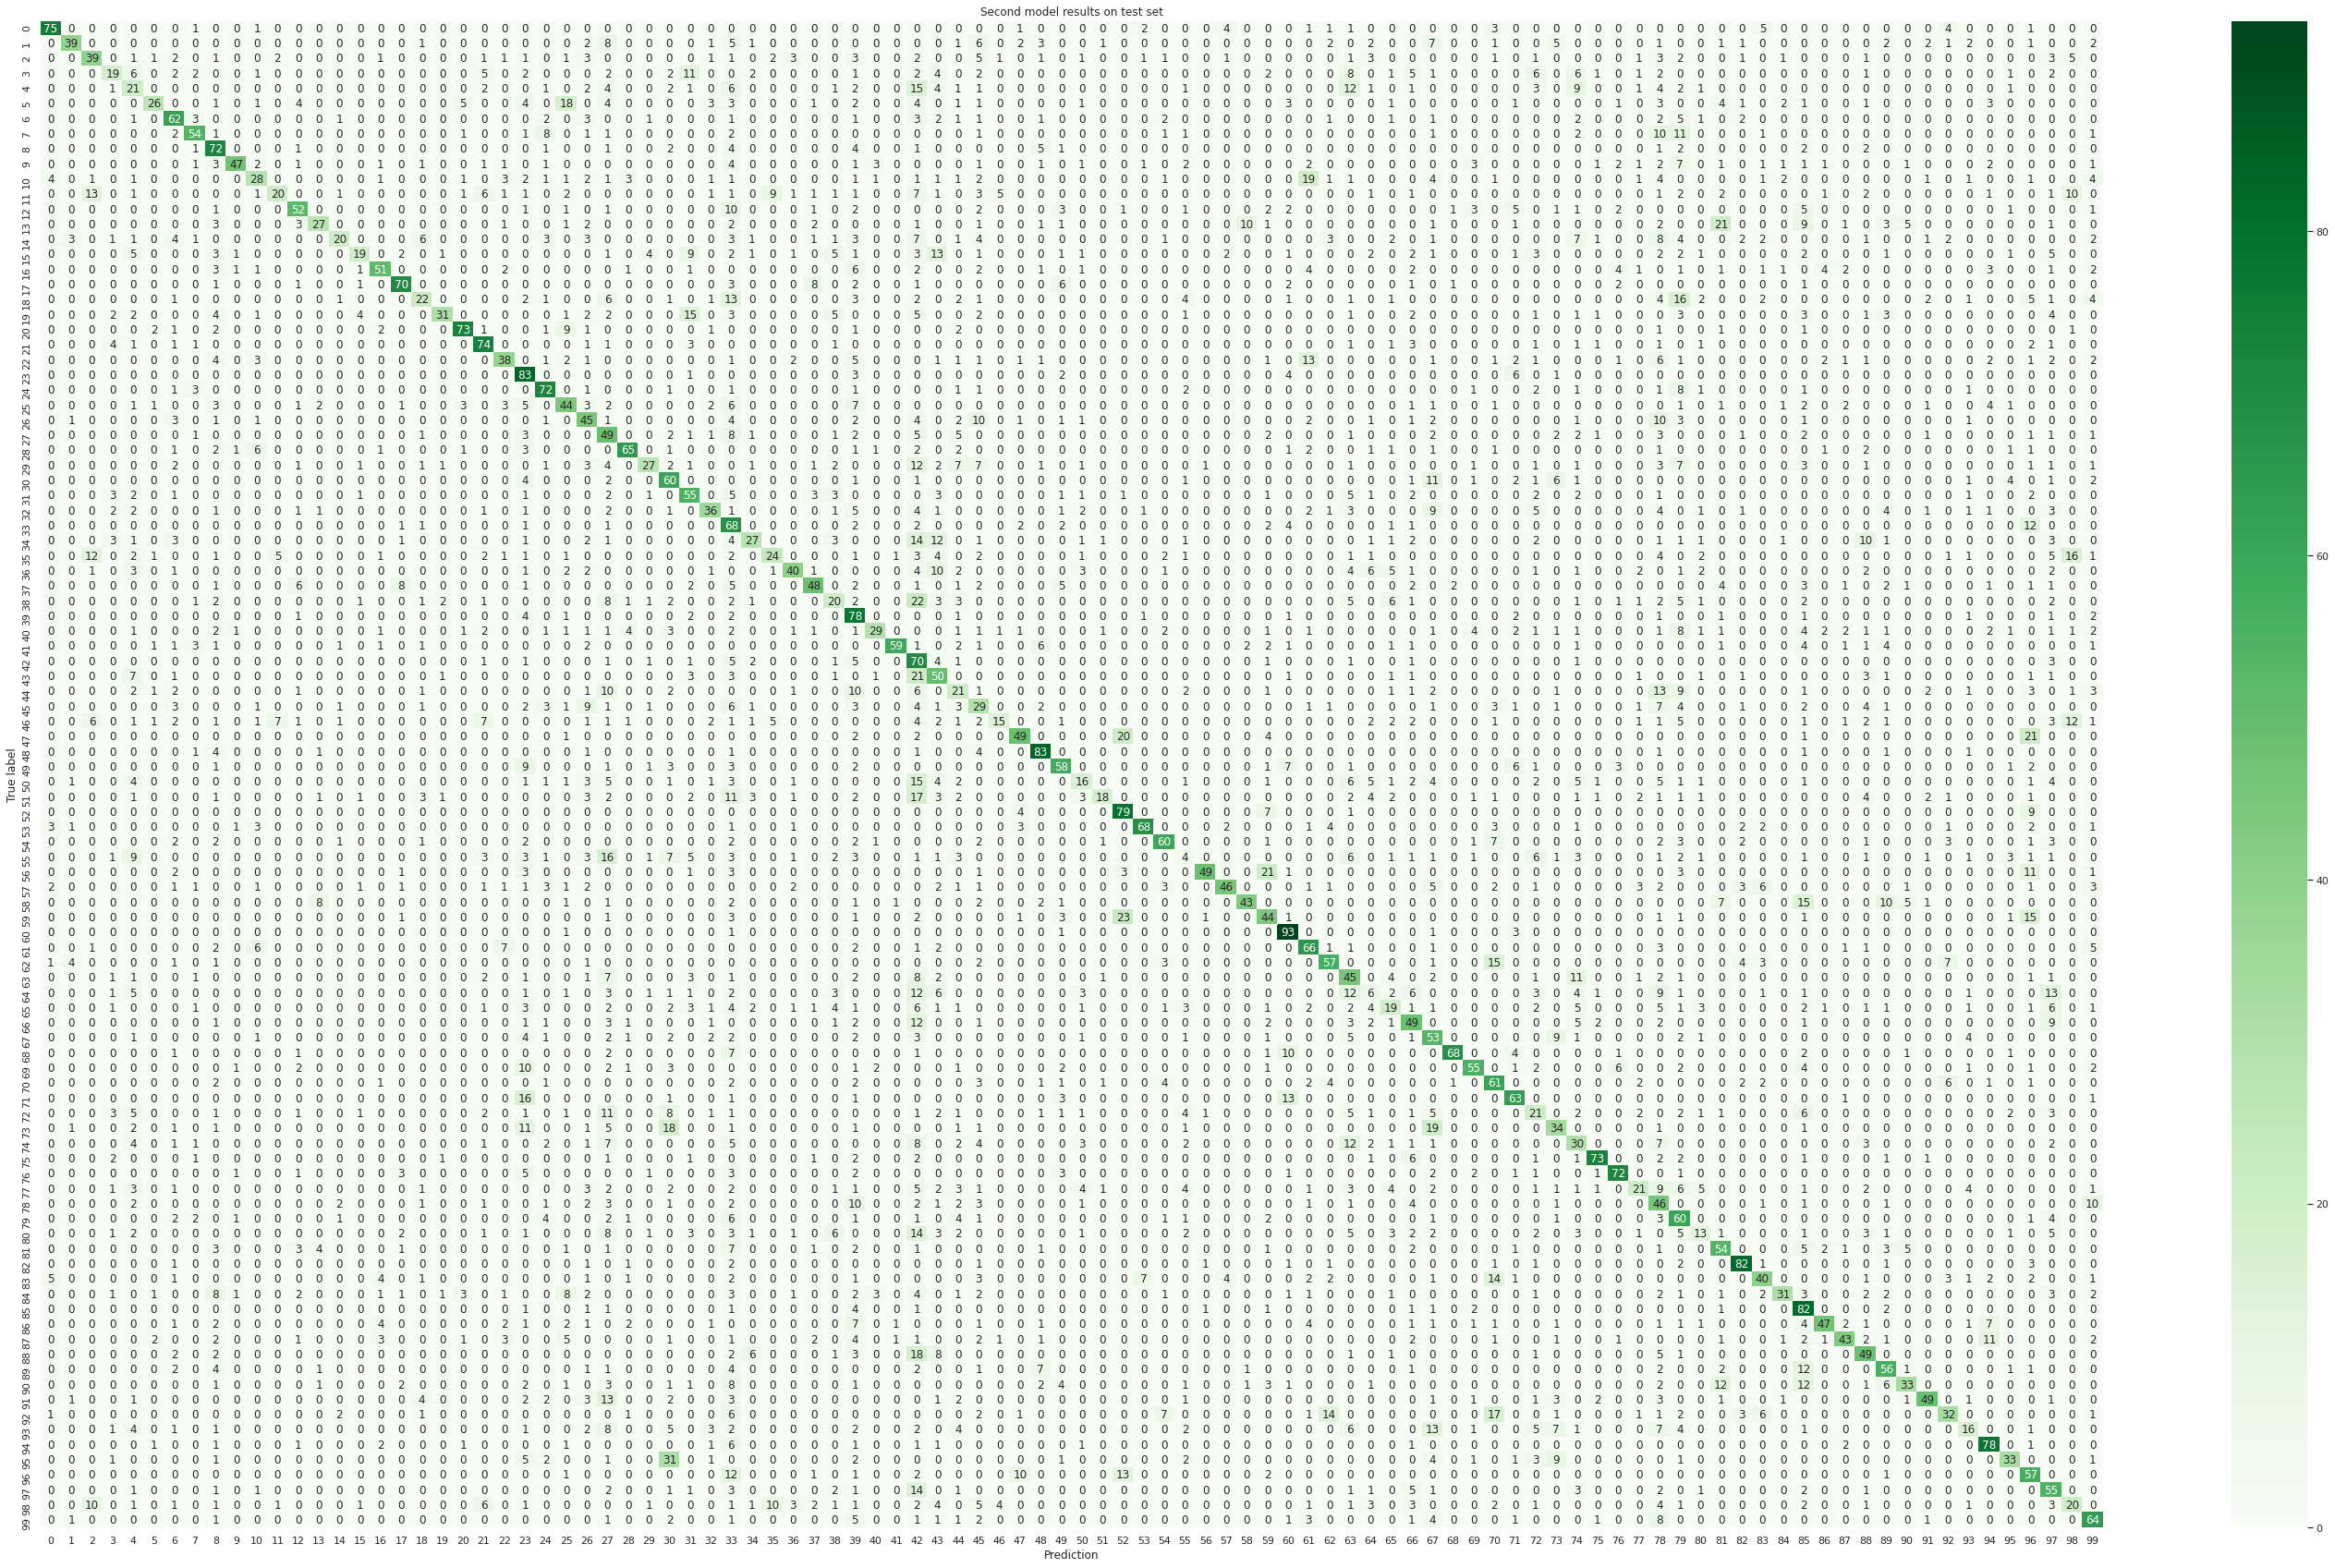

In [ ]:
# plotting a heat map of the predictions on unseen data

y_pred = model2.predict(X_test)
pred_cat = np.argmax(y_pred,axis=1)
confusion_mat2 = confusion_matrix(y_test,pred_cat)
print('model accuracy on test set is: {}%'.format(accuracy_score(y_test,pred_cat)*100))
sns.heatmap(confusion_mat2,cmap='Greens',annot=True, fmt='d')
sns.set(rc={'figure.figsize':(50,30)})
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('Second model results on test set')


### Apparently, the improved model has problems with fish. The most common mistake was predicting **Whales** to be **Dolphins**.

### Below are a few examples for samples from the corresponding classes.


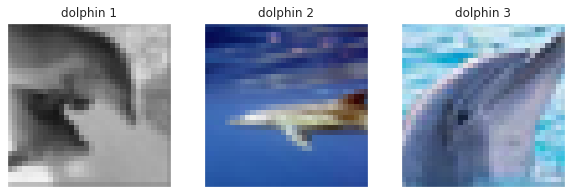

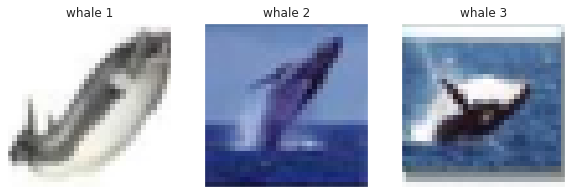

In [ ]:
# picking a common mistake and plotting corresponding samples

pred_index = 30 # dolphin
true_index = 95 # whale

#print samples of the relevant classes
plot_samples(pred_index, 3)
plot_samples(true_index, 3)

# **Part 3- Feature Extruction**
### We chose **ResNet50** architecture with weights calculated for solving **ImageNet**

### a. We excluded the last (top) layer and added a 100-neurons dense layer instead.

### b. We are training all the weights of the model to fit it to our problem (rather then being fit for ImageNet)


In [ ]:
from keras.applications.resnet import ResNet50

# instantiating a pre-weighted ResNet50 model without it's original top
rn50_model = ResNet50(weights='imagenet', include_top=False, pooling='max', input_shape=(32,32,3))

# adding a final layer for adjusting the model for the given 100 class problem
last_hidden_layer = rn50_model._layers[-1].output
new_output_layer = Dense(100, activation='softmax')(last_hidden_layer)
new_rn50_model = Model(rn50_model.inputs, [new_output_layer])

# preparing the model for training the last layer
new_rn50_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
new_rn50_model.summary()

94773248/94765736 [==============================] - 8s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
___________________________

### c. Fitting the model with the new layer on top

In [ ]:
# fitting the model
monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=6)
lr_sched = ReduceLROnPlateau(patience=4)

new_rn50_model.fit(X_train,
    to_categorical(y_train),
    batch_size=200,
    epochs=20,
    verbose=1,
    shuffle=True,
    callbacks=[monitor_val_acc, lr_sched],
    validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 103s 3ms/step - loss: 4.0686 - accuracy: 0.1529 - val_loss: 9.7896 - val_accuracy: 0.0933
Epoch 2/20
40000/40000 [==============================] - 78s 2ms/step - loss: 3.1891 - accuracy: 0.2778 - val_loss: 7.4427 - val_accuracy: 0.2017
Epoch 3/20
40000/40000 [==============================] - 78s 2ms/step - loss: 2.7958 - accuracy: 0.3460 - val_loss: 3.5436 - val_accuracy: 0.2529
Epoch 4/20
40000/40000 [==============================] - 78s 2ms/step - loss: 2.7475 - accuracy: 0.3911 - val_loss: 4.2702 - val_accuracy: 0.2134
Epoch 5/20
40000/40000 [==============================] - 78s 2ms/step - loss: 2.3361 - accuracy: 0.4044 - val_loss: 2.7826 - val_accuracy: 0.3242
Epoch 6/20
40000/40000 [==============================] - 78s 2ms/step - loss: 1.9043 - accuracy: 0.4996 - val_loss: 2.8031 - val_accuracy: 0.3392
Epoch 7/20
40000/40000 [==============================] - 78s 2ms/s

model accuracy on test set is: 50.6%


Text(0.5, 1.0, 'ResNet50 model results on test set')

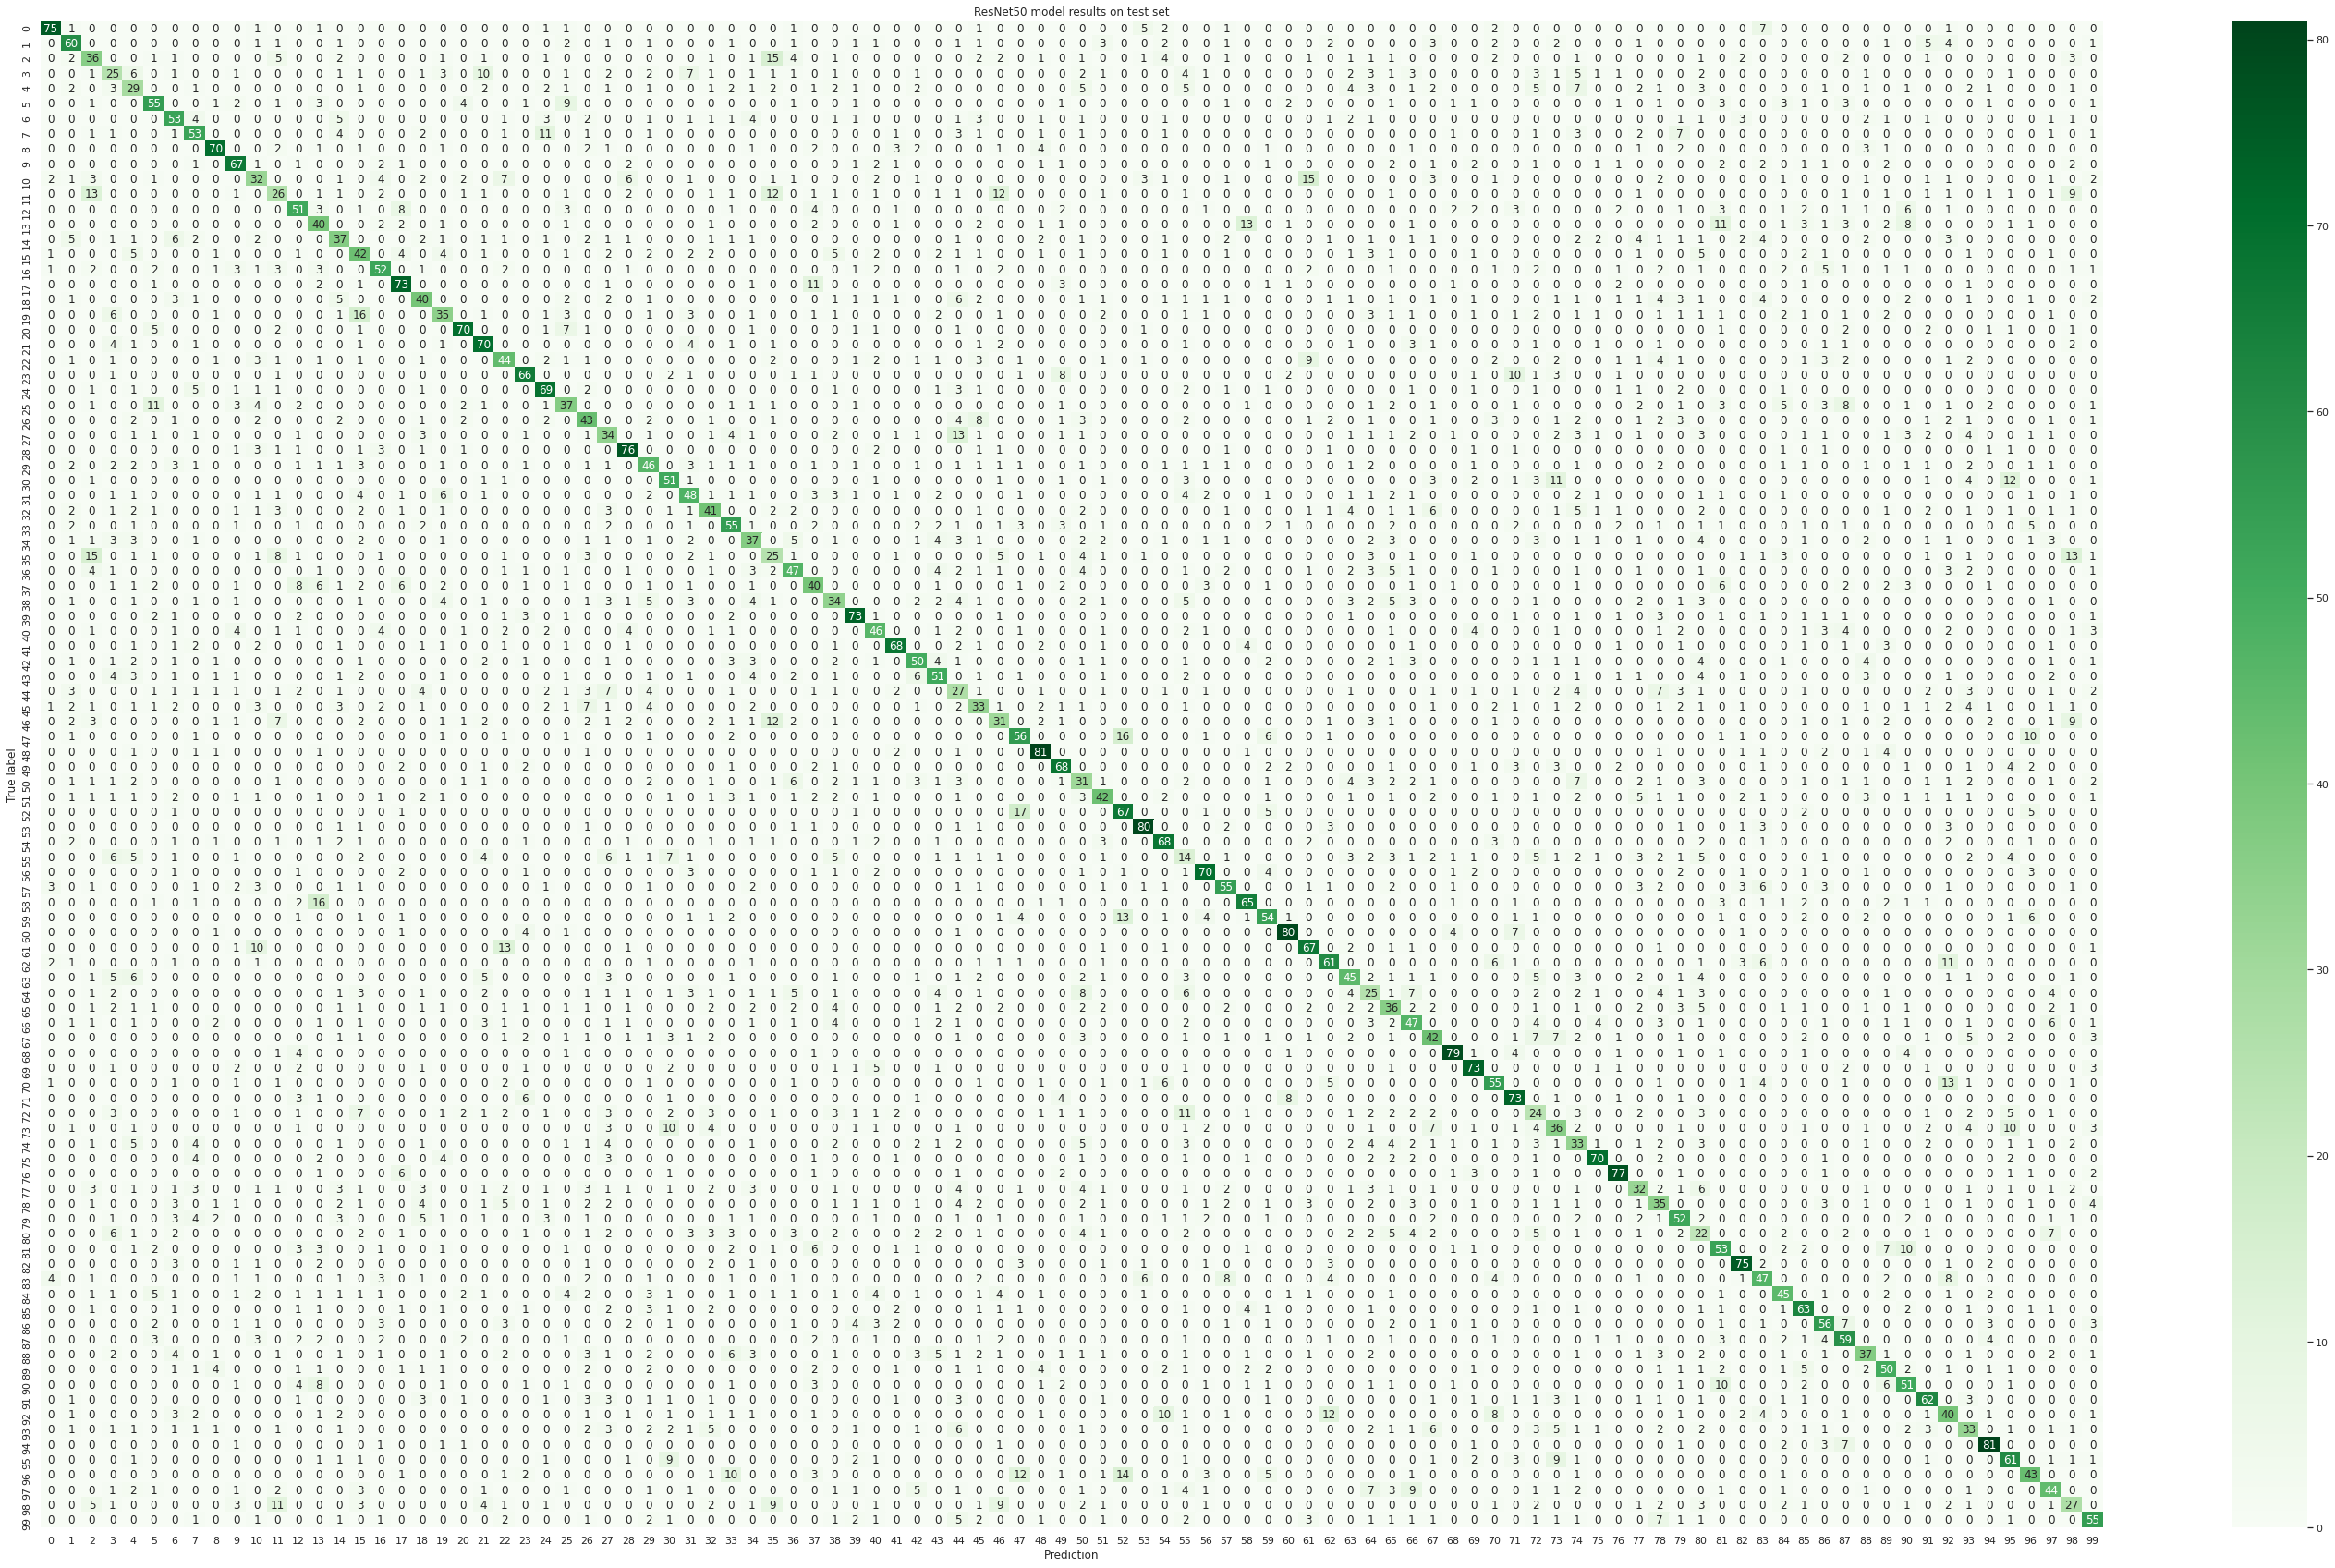

In [ ]:
# plotting a heat map of the predictions on unseen data

y_pred = new_rn50_model.predict(X_test)
pred_cat = np.argmax(y_pred,axis=1)
confusion_mat2 = confusion_matrix(y_test,pred_cat)
print('model accuracy on test set is: {}%'.format(accuracy_score(y_test,pred_cat)*100))
sns.heatmap(confusion_mat2,cmap='Greens',annot=True, fmt='d')
sns.set(rc={'figure.figsize':(50,30)})
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('ResNet50 model results on test set')


### Finally, use the model as a feature extructor. 

### For this, the new layer should be removed, hence the features are "exposed"

In [ ]:
# removing the last layer for exposing the features
new_rn50_model._layers.pop()
last_layer = new_rn50_model._layers[-1]
feature_extraction_model = Model(new_rn50_model.inputs, [last_layer.output])
feature_extraction_model.compile(loss='categorical_crossentropy',optimizer='adam')
feature_extraction_model.summary()

# producing predictions as features
train_features = feature_extraction_model.predict(X_train)
test_features = feature_extraction_model.predict(X_test)


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

### We chose Gaussian Naive Bayes for our classic ML model for proccessing the features.

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
#fitting the classic ML model on the features
gnb.fit(train_features, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

model accuracy on test set is: 39.879999999999995%


Text(0.5, 1.0, 'Feature extruction model results on test set')

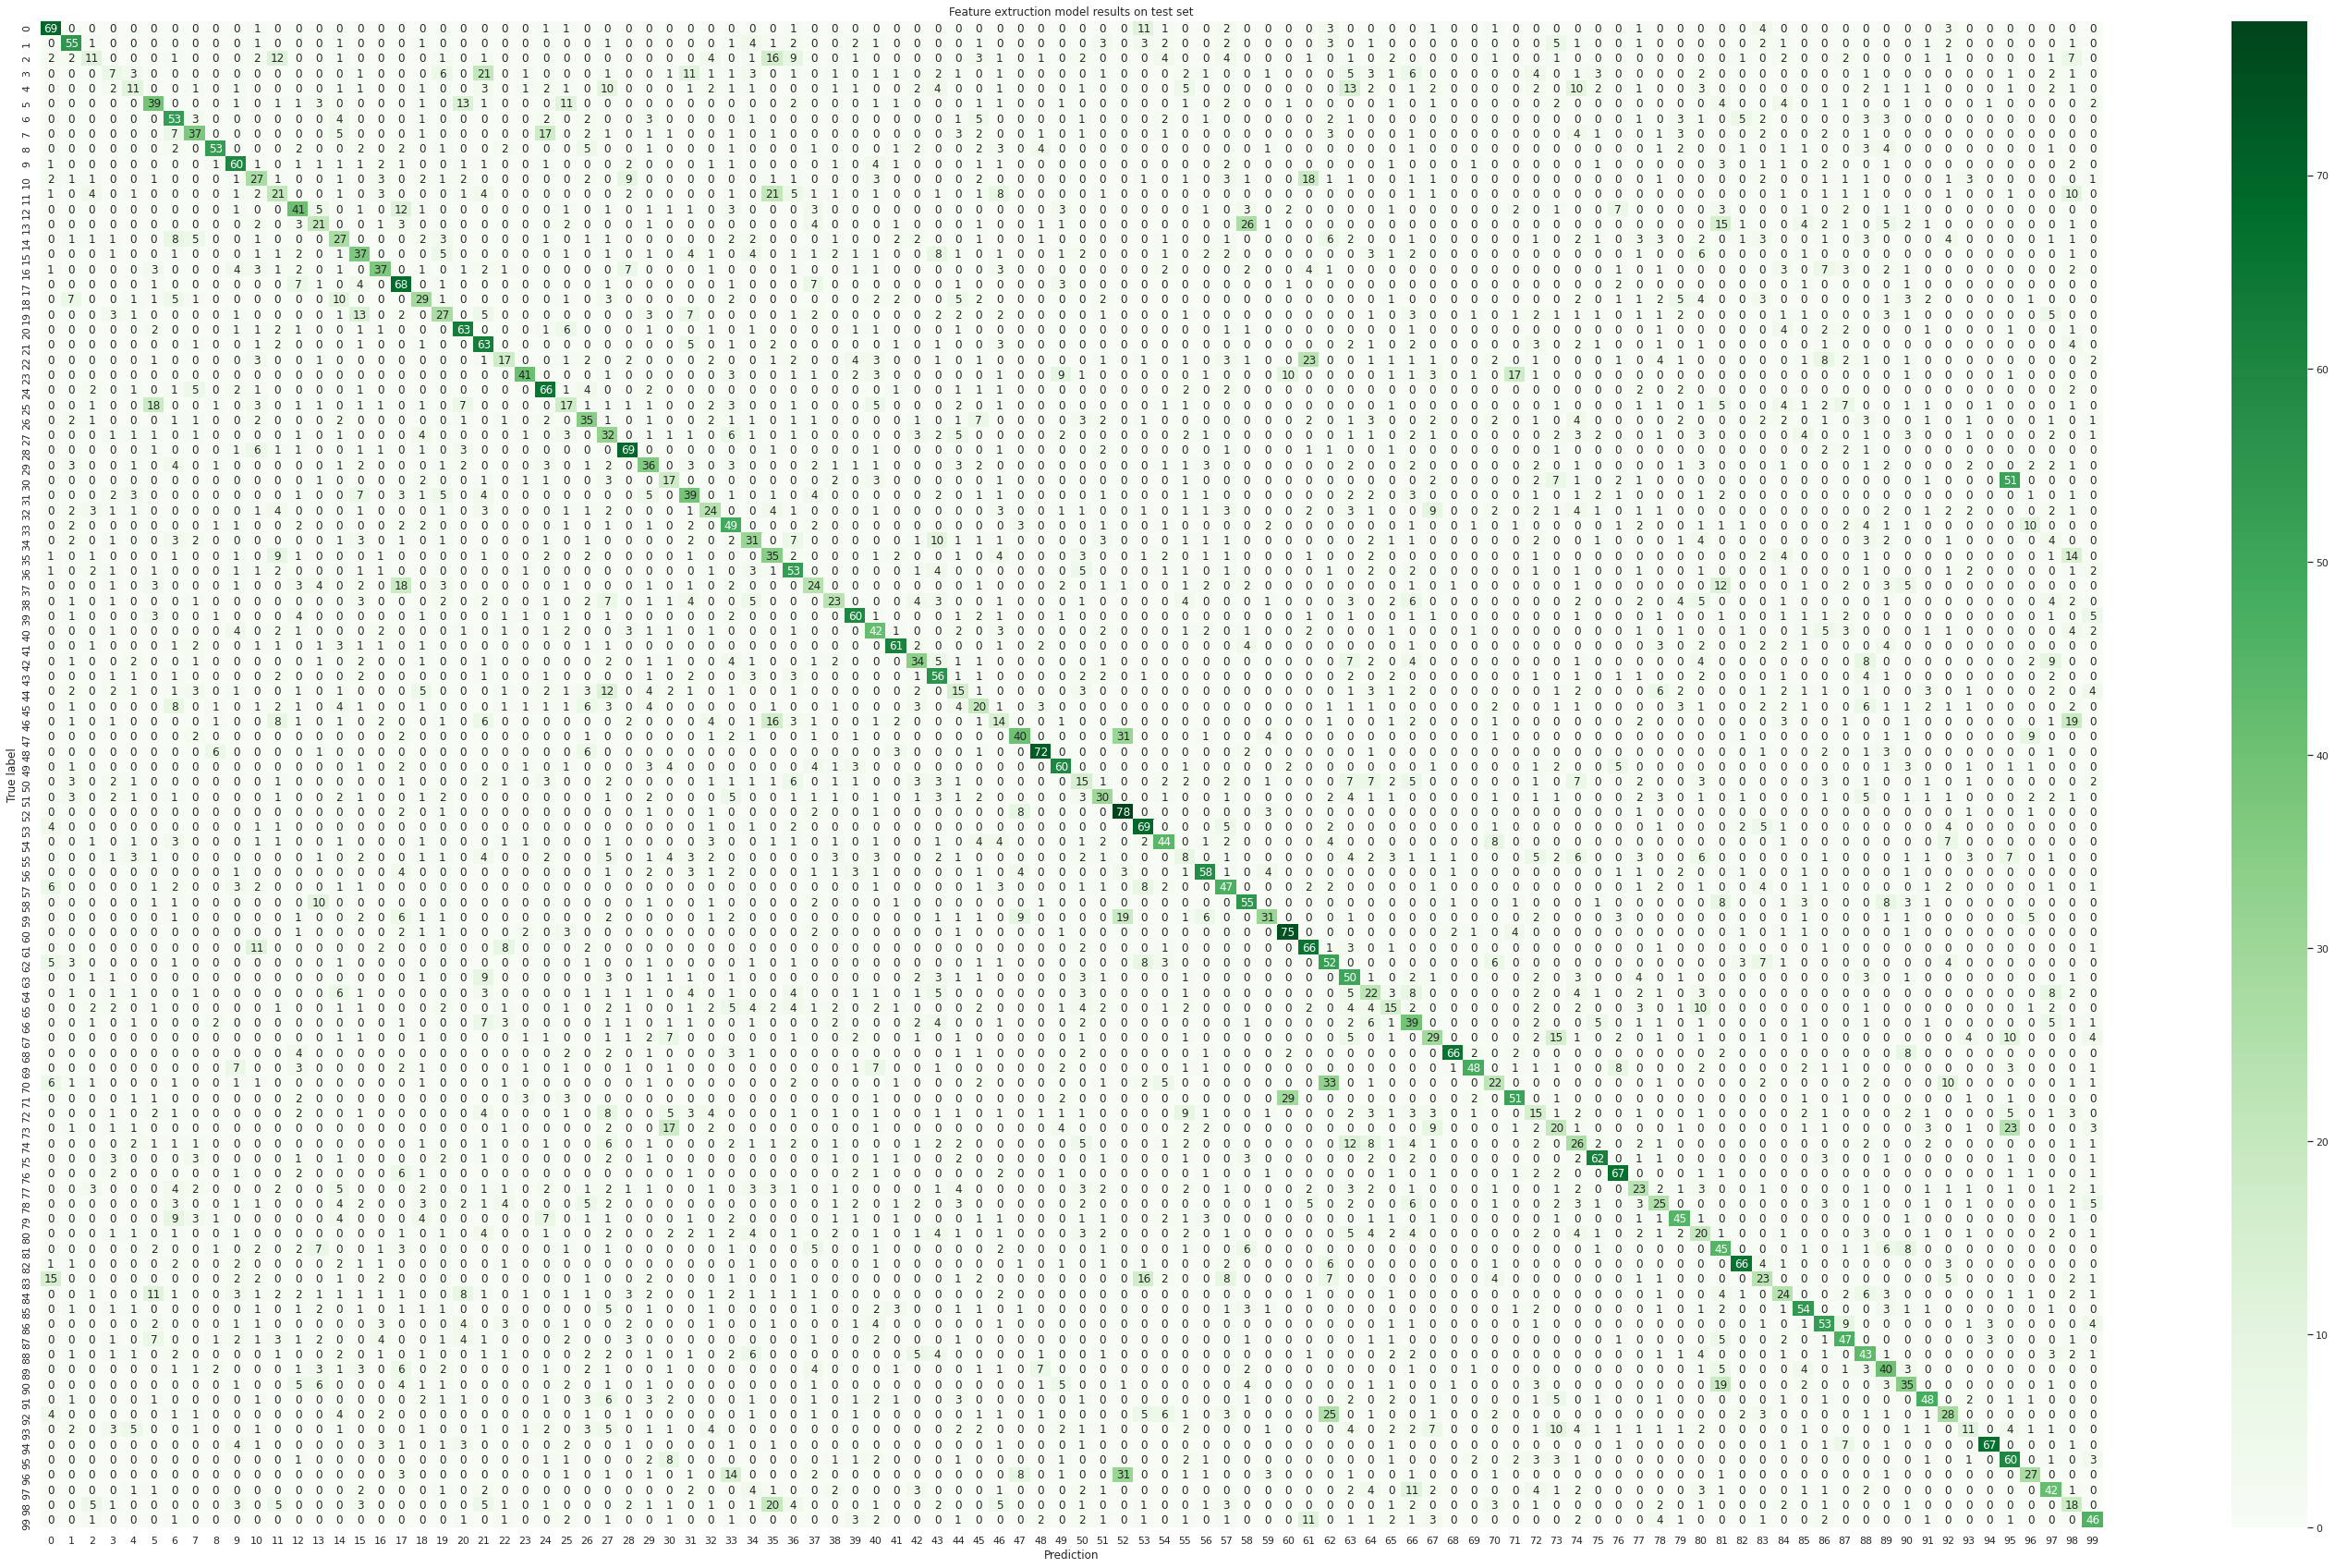

In [ ]:
# plotting a heat map of the predictions on unseen data

y_pred = gnb.predict(test_features)
confusion_mat = confusion_matrix(y_test,y_pred)
print('model accuracy on test set is: {}%'.format(accuracy_score(y_test,y_pred)*100))
sns.heatmap(confusion_mat,cmap='Greens',annot=True, fmt='d')
sns.set(rc={'figure.figsize':(50,30)})
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('Feature extruction model results on test set')

### We can see that the feature extraction did not surpass the ResNet50 model in validation accuracy, getting only **40%** while the ResNet50 model got almost **51%**.

# **Part 4- Report**
These has been our first steps in the field of deep learning, which we've learned alot from. 

Along the way we mostly experimented the basic concepts of developing a NN model, including trying our own ideas of model architectures, trying different widths of layers, trying different types of layers and different depth of architectures. after we got a sense for how it affects the duration and quality of the fitting, we aproached messing with the hyper-parameters in order to see the effect of those on the training process. A good example for this is trying to get above 1% of validation accuracy for hours, and then replacing the **RAdam** optimazer in **Adam**, suddenly getting much better results. This got us deep into understanding the diffrences between these two and the way each works.

In the process of estimating each model's performance we visualized and analysed the fitting process and the results of the process. While doing so, we learned the importance of this step. For example, from the accuracy/epoch chart it is easy to infer that the model is overfitted, and from the heat-map of the confusion matrix you can spot the most common mistakes the model made during classification of the test set. In our case, we saw that the first model had hard time differentiating  between two kinds of trees and the second model mistakenly classified whales as dolphins, and these mistakes made us wonder what made the model make these mistakes. In the case of the trees, it is probably the **general hue** of the images and the texture of the foliage of the trees. When we examine the pictures of the whales and the dolphins side to side, the hues of the pictures are not so similar , which leads to the conclusion that the common feature is probably **edge curves**, that is, the body shape of a whale is similar  to a dolphin's shape, disregarding the scale.

The use of good practice tools in training a good model also made us learn about the process. We saw that data augmentation is efficient in preventing overfitting and that feature extraction can be used to apply solutions that proven to work on other problems on our problem, which could be useful. In our case, the feature extraction didn't go as expected and the performence were not improved in comparison to the trained ResNet50 model. Prior to the feature extraction documented on this report, we tried fine tunning the ResNet50 model with it's weights fit to ImageNet, but it didn't went well eighter, achieving poor performance on the test set. In the procces of achieving better results, we tried also VGG16 as a feature extructor, and as classic ML model we tried KNeighbors, DecisionTree and SVC before setteling on GaussianNaiveBayes that got the best results.

Overall, we gained much knowledge (atleast in relation to what we held before) and now we feel more prepared for the challenges of the course that are yet to come.